In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='whitegrid')

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict, Counter

import re
import gensim
import string

from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
stop = set(stopwords.words('english'))

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

import warnings
warnings.simplefilter('ignore')

## Data Exploratory

In [ ]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')

In [ ]:
df.shape, df_test.shape

((7613, 5), (7613, 5))

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

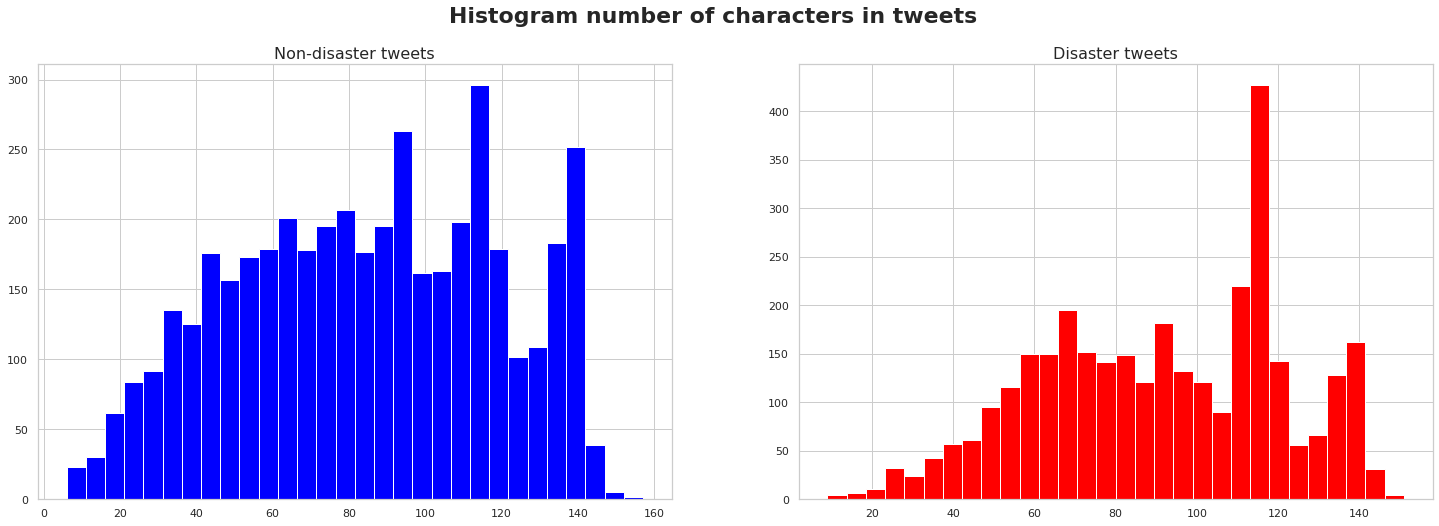

In [ ]:
sns.set(style='whitegrid')
f, (ax1, ax2) = plt.subplots(1,2,figsize=(25,8))

ax1.hist(df[df['target'] == 0]['text'].str.len(), bins=30, color='blue')
ax1.set_title('Non-disaster tweets', fontsize=16)

ax2.hist(df[df['target'] == 1]['text'].str.len(), bins=30, color='red')
ax2.set_title('Disaster tweets', fontsize=16)

f.suptitle('Histogram number of characters in tweets', fontsize=22, weight='bold')
f.savefig('Histogram number of characters in tweets')

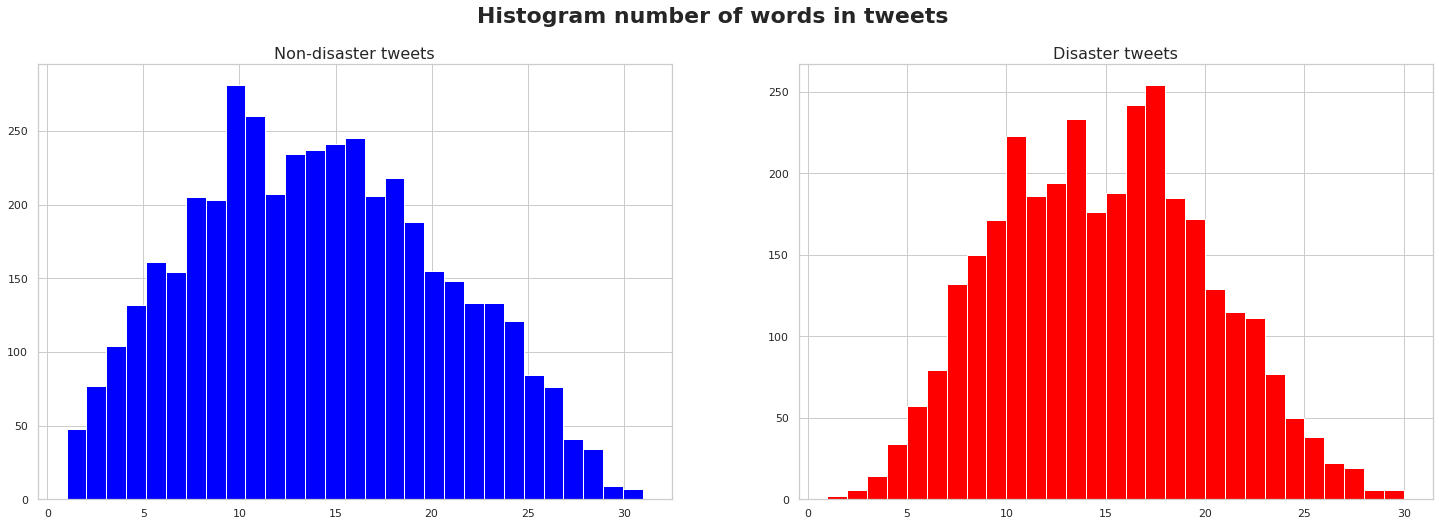

In [ ]:
f, (ax1, ax2,) = plt.subplots(1,2,figsize=(25,8))

ax1.hist(df[df['target'] == 0]['text'].str.split().map(lambda x: len(x)), bins=29, color='blue')
ax1.set_title('Non-disaster tweets', fontsize=16)

ax2.hist(df[df['target'] == 1]['text'].str.split().map(lambda x: len(x)), bins=29, color='red')
ax2.set_title('Disaster tweets', fontsize=16)

f.suptitle('Histogram number of words in tweets', fontsize=22, weight='bold')
f.savefig('Histogram number of words in tweets')

Average word length in a tweet:

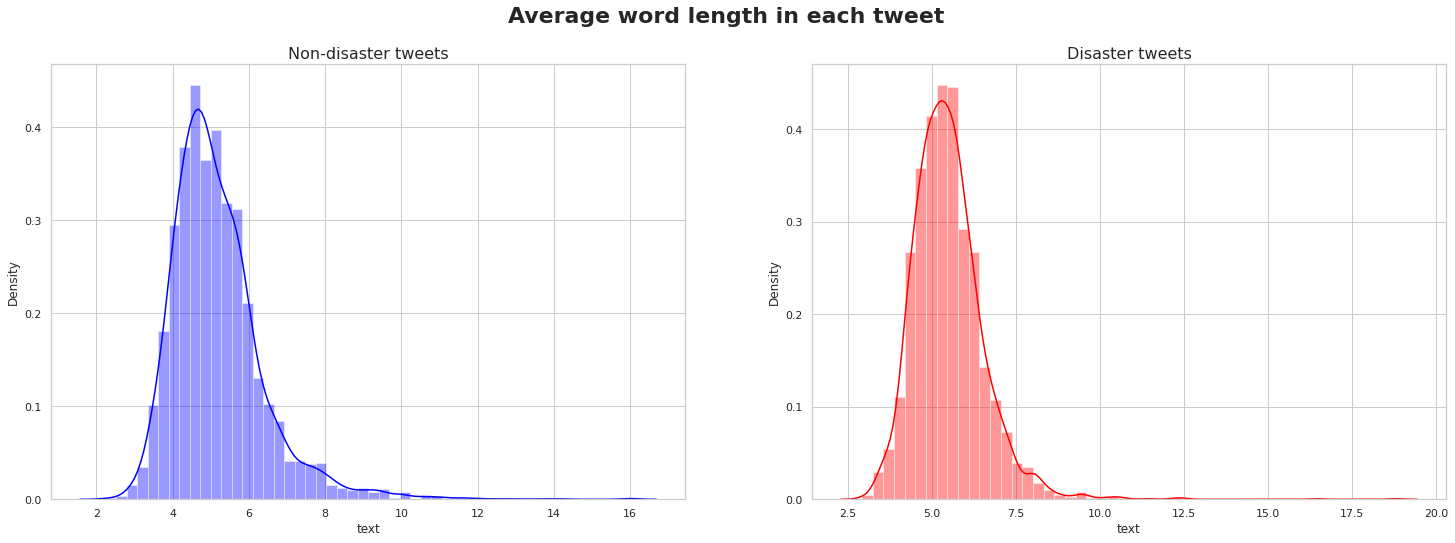

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
word = df[df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Non-disaster tweets', fontsize=16)

word = df[df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Disaster tweets', fontsize=16)

fig.suptitle('Average word length in each tweet', fontsize=22, weight='bold')
fig.savefig('Average word length in each tweet')

Corpus:

In [ ]:
def create_corpus(target):
    corpus = []
    
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

Common stopwords in tweets:

In [ ]:
## class 0
corpus = create_corpus(0)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x0, y0 = zip(*top)

In [ ]:
## class 1
corpus = create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x1, y1=zip(*top)

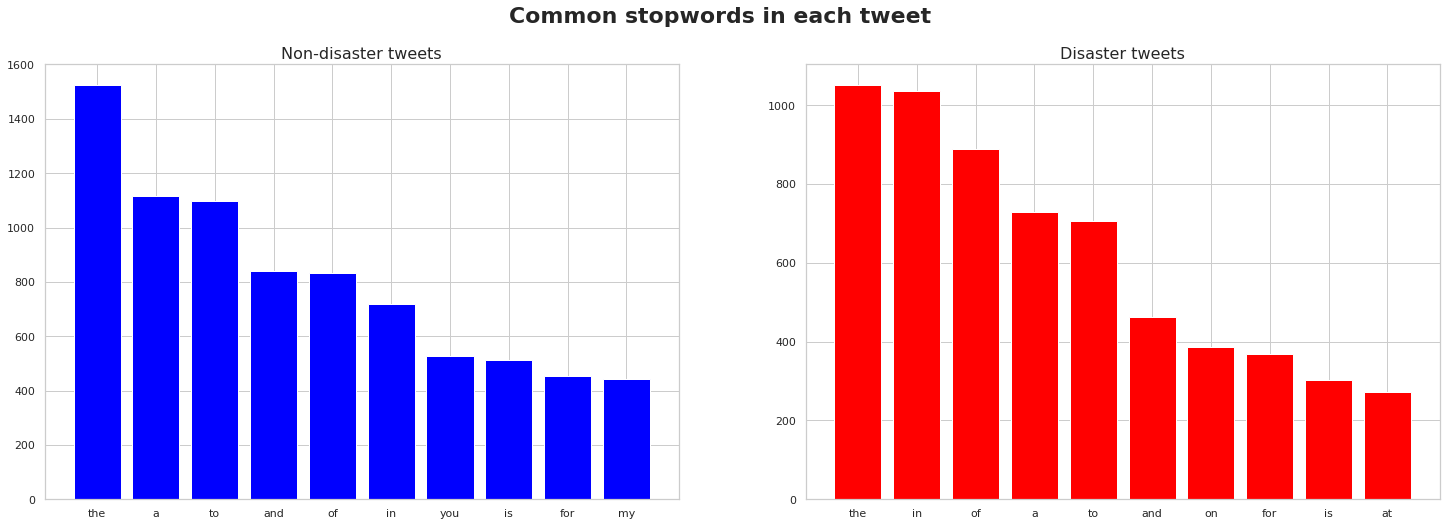

In [ ]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(25,8))
ax1.bar(x0, y0, color='blue')
ax1.set_title('Non-disaster tweets', fontsize=16)

ax2.bar(x1, y1, color='red')
ax2.set_title('Disaster tweets', fontsize=16)

fig.suptitle('Common stopwords in each tweet', fontsize=22, weight='bold')
fig.savefig('Common stopwords in each tweet')

Analyzing punctuations:

In [ ]:
## class 0
corpus = create_corpus(0)

dic = defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
p0, pp0 = zip(*dic.items())

In [ ]:
## class 1
corpus = create_corpus(1)

dic = defaultdict(int)
for i in (corpus):
    if i in special:
        dic[i]+=1
        
p1, pp1 = zip(*dic.items())

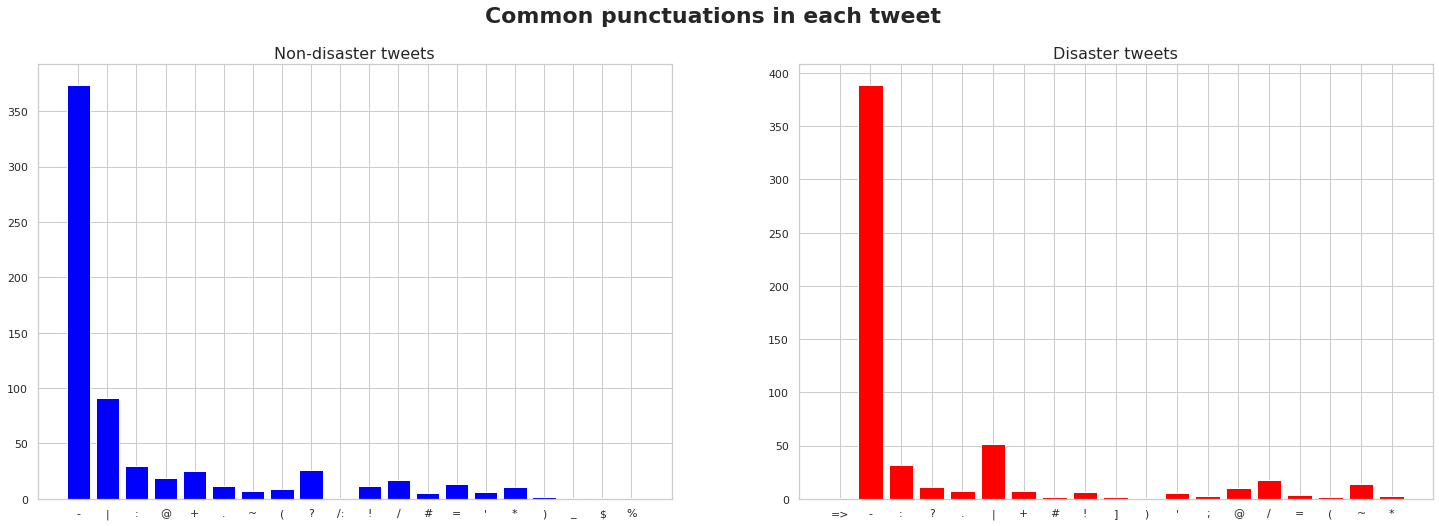

In [ ]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(25,8))
ax1.bar(p0, pp0, color='blue')
ax1.set_title('Non-disaster tweets', fontsize=16)

ax2.bar(p1, pp1, color='red')
ax2.set_title('Disaster tweets', fontsize=16)

fig.suptitle('Common punctuations in each tweet', fontsize=22, weight='bold')
fig.savefig('Common punctuations in each tweet')

Common words:

In [ ]:
corpus = create_corpus(0)
counter = Counter(corpus)
most = counter.most_common()
c0 = []
cc0 = []
for word, count in most[:40]:
    if (word not in stop):
        c0.append(word)
        cc0.append(count)

In [ ]:
corpus = create_corpus(1)
counter = Counter(corpus)
most = counter.most_common()
c1 = []
cc1 = []
for word, count in most[:40]:
    if (word not in stop):
        c1.append(word)
        cc1.append(count)

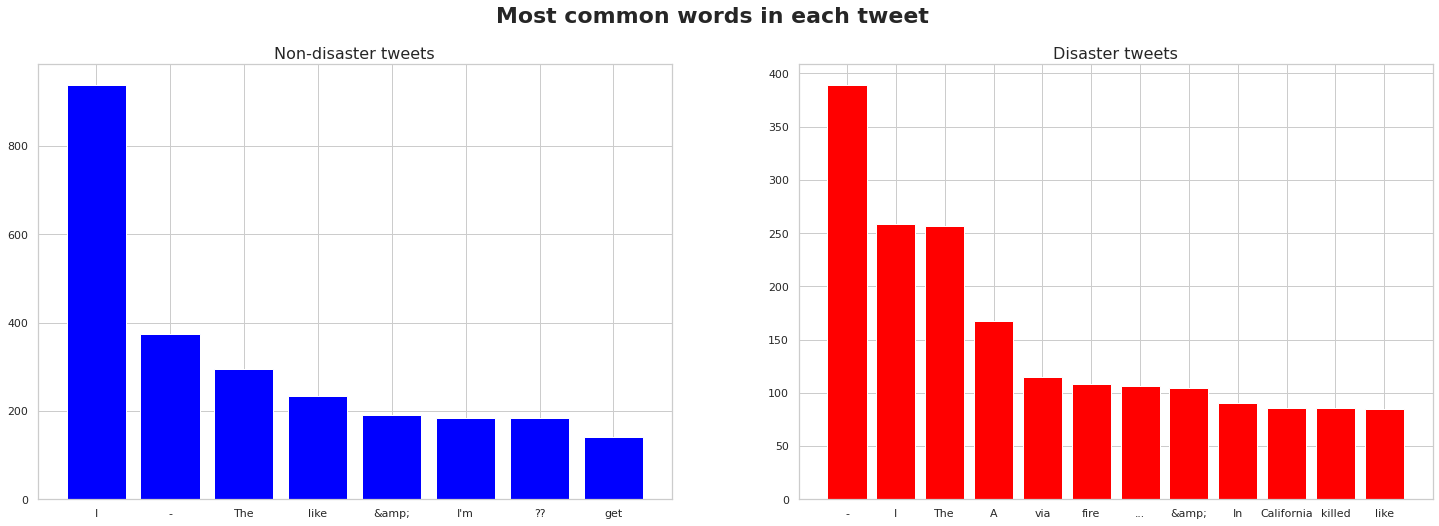

In [ ]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(25,8))
ax1.bar(c0, cc0, color='blue')
ax1.set_title('Non-disaster tweets', fontsize=16)

ax2.bar(c1, cc1, color='red')
ax2.set_title('Disaster tweets', fontsize=16)

fig.suptitle('Most common words in each tweet', fontsize=22, weight='bold')
fig.savefig('Most common words in each tweet')

## Data Preprocessing

Removing URLs:

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['text']=df['text'].apply(lambda x : remove_URL(x))
df_test['text']=df_test['text'].apply(lambda x : remove_URL(x))

Removing HTML tags:

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df['text']=df['text'].apply(lambda x : remove_html(x))
df_test['text']=df_test['text'].apply(lambda x : remove_html(x))

Removing emojis:

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text']=df['text'].apply(lambda x: remove_emoji(x))
df_test['text']=df_test['text'].apply(lambda x: remove_emoji(x))

Removing punctuations:

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df['text']=df['text'].apply(lambda x : remove_punct(x))
df_test['text']=df_test['text'].apply(lambda x : remove_punct(x))

Removing multiple spaces:

In [ ]:
df['text']=df['text'].str.replace('   ', ' ')
df['text']=df['text'].str.replace('     ', ' ')
df['text']=df['text'].str.replace('\xa0 \xa0 \xa0', ' ')
df['text']=df['text'].str.replace('  ', ' ')
df['text']=df['text'].str.replace('—', ' ')
df['text']=df['text'].str.replace('–', ' ')

In [ ]:
df_test['text']=df_test['text'].str.replace('   ', ' ')
df_test['text']=df_test['text'].str.replace('     ', ' ')
df_test['text']=df_test['text'].str.replace('\xa0 \xa0 \xa0', ' ')
df_test['text']=df_test['text'].str.replace('  ', ' ')
df_test['text']=df_test['text'].str.replace('—', ' ')
df_test['text']=df_test['text'].str.replace('–', ' ')

Replacing contractions and acronyms:

In [ ]:
def cleaner(tweet):
  # Acronyms and miswritten words
  tweet = re.sub(r"Typhoon-Devastated", "typhoon devastated", tweet)
  tweet = re.sub(r"TyphoonDevastated", "typhoon devastated", tweet)
  tweet = re.sub(r"typhoondevastated", "typhoon devastated", tweet)
  tweet = re.sub(r"MH370", "Malaysia Airlines Flight", tweet)
  tweet = re.sub(r"MH", "Malaysia Airlines Flight", tweet)
  tweet = re.sub(r"mh370", "Malaysia Airlines Flight", tweet)
  tweet = re.sub(r"year-old", "years old", tweet)
  tweet = re.sub(r"yearold", "years old", tweet)
  tweet = re.sub(r"yr old", "years old", tweet)
  tweet = re.sub(r"PKK", "Kurdistan Workers Party", tweet)
  tweet = re.sub(r"MP", "madhya pradesh", tweet)
  tweet = re.sub(r"rly", "railway", tweet)
  tweet = re.sub(r"CDT", "Central Daylight Time", tweet)
  tweet = re.sub(r"sensorsenso", "sensor senso", tweet)
  tweet = re.sub(r"pm", "", tweet)
  tweet = re.sub(r"PM", "", tweet)
  tweet = re.sub(r"nan", " ", tweet)
  tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
  tweet = re.sub(r"epicente", "epicenter", tweet)
  tweet = re.sub(r"epicenterr", "epicenter", tweet)
  tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
  tweet = re.sub(r"prebreak", "pre break", tweet)
  tweet = re.sub(r"nowplaying", "now playing", tweet)
  tweet = re.sub(r"RT", "retweet", tweet)
  tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
  tweet = re.sub(r"LondonFire", "London Fire", tweet)
  tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
  tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
  tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
  tweet = re.sub(r"withweapons", "with weapons", tweet)
  tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
  tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
  tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
  tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)

  # Special characters
  tweet = re.sub(r"%20", " ", tweet)
  tweet = re.sub(r"%", " ", tweet)
  tweet = re.sub(r"@", " ", tweet)
  tweet = re.sub(r"#", " ", tweet)
  tweet = re.sub(r"'", " ", tweet)
  tweet = re.sub(r"\x89û_", " ", tweet)
  tweet = re.sub(r"\x89ûò", " ", tweet)
  tweet = re.sub(r"16yr", "16 year", tweet)
  tweet = re.sub(r"re\x89û_", " ", tweet)
  tweet = re.sub(r"\x89û", " ", tweet)
  tweet = re.sub(r"\x89Û", " ", tweet)
  tweet = re.sub(r"re\x89Û", "re ", tweet)
  tweet = re.sub(r"re\x89û", "re ", tweet)
  tweet = re.sub(r"\x89ûª", "'", tweet)
  tweet = re.sub(r"\x89û", " ", tweet)
  tweet = re.sub(r"\x89ûò", " ", tweet)
  tweet = re.sub(r"\x89Û_", "", tweet)
  tweet = re.sub(r"\x89ÛÒ", "", tweet)
  tweet = re.sub(r"\x89ÛÓ", "", tweet)
  tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
  tweet = re.sub(r"\x89ÛÏ", "", tweet)
  tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
  tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
  tweet = re.sub(r"\x89Û÷", "", tweet)
  tweet = re.sub(r"\x89Ûª", "", tweet)
  tweet = re.sub(r"\x89Û\x9d", "", tweet)
  tweet = re.sub(r"å_", "", tweet)
  tweet = re.sub(r"\x89Û¢", "", tweet)
  tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
  tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
  tweet = re.sub(r"åÊ", "", tweet)
  tweet = re.sub(r"åÈ", "", tweet)
  tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
  tweet = re.sub(r"Ì©", "e", tweet)
  tweet = re.sub(r"å¨", "", tweet)
  tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
  tweet = re.sub(r"åÇ", "", tweet)
  tweet = re.sub(r"å£3million", "3 million", tweet)
  tweet = re.sub(r"åÀ", "", tweet)

  # Contractions
  tweet = re.sub(r"he's", "he is", tweet)
  tweet = re.sub(r"there's", "there is", tweet)
  tweet = re.sub(r"We're", "We are", tweet)
  tweet = re.sub(r"That's", "That is", tweet)
  tweet = re.sub(r"won't", "will not", tweet)
  tweet = re.sub(r"they're", "they are", tweet)
  tweet = re.sub(r"Can't", "Cannot", tweet)
  tweet = re.sub(r"wasn't", "was not", tweet)
  tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
  tweet = re.sub(r"aren't", "are not", tweet)
  tweet = re.sub(r"isn't", "is not", tweet)
  tweet = re.sub(r"What's", "What is", tweet)
  tweet = re.sub(r"haven't", "have not", tweet)
  tweet = re.sub(r"hasn't", "has not", tweet)
  tweet = re.sub(r"There's", "There is", tweet)
  tweet = re.sub(r"He's", "He is", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"You're", "You are", tweet)
  tweet = re.sub(r"I'M", "I am", tweet)
  tweet = re.sub(r"Im", "I am", tweet)
  tweet = re.sub(r"shouldn't", "should not", tweet)
  tweet = re.sub(r"wouldn't", "would not", tweet)
  tweet = re.sub(r"i'm", "I am", tweet)
  tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
  tweet = re.sub(r"I'm", "I am", tweet)
  tweet = re.sub(r"Isn't", "is not", tweet)
  tweet = re.sub(r"Here's", "Here is", tweet)
  tweet = re.sub(r"you've", "you have", tweet)
  tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
  tweet = re.sub(r"we're", "we are", tweet)
  tweet = re.sub(r"what's", "what is", tweet)
  tweet = re.sub(r"couldn't", "could not", tweet)
  tweet = re.sub(r"we've", "we have", tweet)
  tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
  tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
  tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
  tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
  tweet = re.sub(r"who's", "who is", tweet)
  tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
  tweet = re.sub(r"y'all", "you all", tweet)
  tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
  tweet = re.sub(r"would've", "would have", tweet)
  tweet = re.sub(r"it'll", "it will", tweet)
  tweet = re.sub(r"we'll", "we will", tweet)
  tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
  tweet = re.sub(r"We've", "We have", tweet)
  tweet = re.sub(r"he'll", "he will", tweet)
  tweet = re.sub(r"Y'all", "You all", tweet)
  tweet = re.sub(r"Weren't", "Were not", tweet)
  tweet = re.sub(r"Didn't", "Did not", tweet)
  tweet = re.sub(r"they'll", "they will", tweet)
  tweet = re.sub(r"they'd", "they would", tweet)
  tweet = re.sub(r"DON'T", "DO NOT", tweet)
  tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
  tweet = re.sub(r"they've", "they have", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"should've", "should have", tweet)
  tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
  tweet = re.sub(r"where's", "where is", tweet)
  tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
  tweet = re.sub(r"we'd", "we would", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"weren't", "were not", tweet)
  tweet = re.sub(r"They're", "They are", tweet)
  tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
  tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
  tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
  tweet = re.sub(r"let's", "let us", tweet)
  tweet = re.sub(r"it's", "it is", tweet)
  tweet = re.sub(r"can't", "can not", tweet)
  tweet = re.sub(r"cant", "can not", tweet)
  tweet = re.sub(r"don't", "do not", tweet)
  tweet = re.sub(r"dont", "do not", tweet)
  tweet = re.sub(r"you're", "you are", tweet)
  tweet = re.sub(r"i've", "I have", tweet)
  tweet = re.sub(r"that's", "that is", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"doesn't", "does not", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"didn't", "did not", tweet)
  tweet = re.sub(r"ain't", "am not", tweet)
  tweet = re.sub(r"you'll", "you will", tweet)
  tweet = re.sub(r"I've", "I have", tweet)
  tweet = re.sub(r"Don't", "do not", tweet)
  tweet = re.sub(r"I'll", "I will", tweet)
  tweet = re.sub(r"I'd", "I would", tweet)
  tweet = re.sub(r"Let's", "Let us", tweet)
  tweet = re.sub(r"you'd", "You would", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"Ain't", "am not", tweet)
  tweet = re.sub(r"Haven't", "Have not", tweet)
  tweet = re.sub(r"Could've", "Could have", tweet)
  tweet = re.sub(r"youve", "you have", tweet)  
  tweet = re.sub(r"donå«t", "do not", tweet)

  return tweet

df['text'] = df['text'].apply(lambda s : cleaner(s))
df_test['text'] = df_test['text'].apply(lambda s : cleaner(s))

Removing numbers:

In [ ]:
df['text']=df['text'].str.replace('\d+', '')
df_test['text']=df_test['text'].str.replace('\d+', '')

Common words after cleaning:

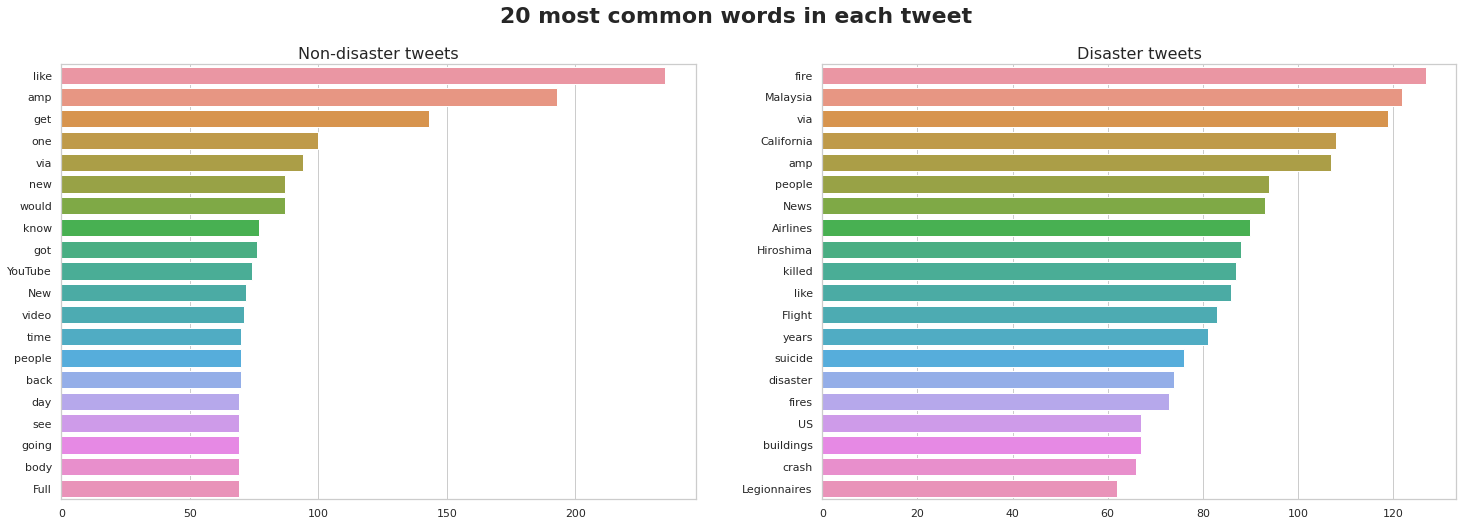

In [ ]:
## Non-disaster
word_count0 = Counter(" ".join(df[df['target']==0]['text']).split()).most_common(100)
w0 = []
ww0 = []
for word, count in word_count0:
    if (word.casefold() not in stop) :
        w0.append(word)
        ww0.append(count)

## Disaster
word_count1 = Counter(" ".join(df[df['target']==1]['text']).split()).most_common(100)
w1 = []
ww1 = []
for word, count in word_count1:
    if (word.casefold() not in stop) :
        w1.append(word)
        ww1.append(count)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
sns.barplot(x = ww0[:20], y = w0[:20], ax=ax1)
ax1.set_title('Non-disaster tweets', fontsize=16)

sns.barplot(x = ww1[:20], y = w1[:20], ax=ax2)
ax2.set_title('Disaster tweets', fontsize=16)

fig.suptitle('20 most common words in each tweet', fontsize=22, weight='bold')
fig.savefig('20 most common words in each tweet')

## Baseline Model - Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Train-Test split:

In [ ]:
x = df['text']
y = df['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

5709 5709
1904 1904


MultiNB model:

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_train = pipe.predict(x_train)
y_pred_class = pipe.predict(x_test)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

Train: 0.7852513575056927
Test: 0.5640756302521008


In [ ]:
print(classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      1725
           1       0.10      0.43      0.16       179

    accuracy                           0.56      1904
   macro avg       0.50      0.50      0.43      1904
weighted avg       0.83      0.56      0.65      1904



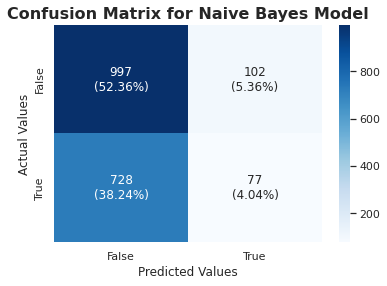

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_class)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

## Plotting
#plt.figure(figsize=(10,6))

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Model', fontsize=16, weight='bold')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()
ax.get_figure().savefig('Confusion Matrix for Naive Bayes Model.png')

## XGBoost model

In [ ]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='auc',
        random_state=100
    ))
])

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_train = pipe.predict(x_train)
y_pred_class = pipe.predict(x_test)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

Train: 0.6239271325976529
Test: 0.5582983193277311


In [ ]:
print(classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1788
           1       0.05      0.34      0.09       116

    accuracy                           0.56      1904
   macro avg       0.49      0.46      0.40      1904
weighted avg       0.88      0.56      0.67      1904



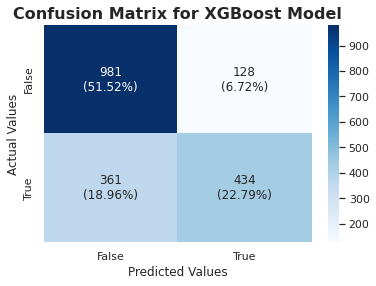

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_class)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

## Plotting
#plt.figure(figsize=(10,6))

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for XGBoost Model', fontsize=16, weight='bold')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()
ax.get_figure().savefig('Confusion Matrix for XGBoost Model.png')

## GloVe LSTM

In [ ]:
train_tweets = df['text'].values
test_tweets = df_test['text'].values
train_target = df['target'].values

In [ ]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_tweets)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

17031

In [ ]:
## Pad sequences
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)
    
longest_train = max(train_tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(train_tweets), 
    length_long_sentence, 
    padding='post'
)
test_padded_sentences = pad_sequences(
    embed(test_tweets), 
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[ 106, 4369,   22, ...,    0,    0,    0],
       [ 178,   38,  218, ...,    0,    0,    0],
       [  40, 1670, 1540, ...,    0,    0,    0],
       ...,
       [ 259, 4060,  148, ...,    0,    0,    0],
       [  74, 1093,   39, ...,    0,    0,    0],
       [   1,  197,   53, ...,    0,    0,    0]], dtype=int32)

In [ ]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions
fp.close()

In [ ]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.27085999,  0.044006  , -0.02026   , ..., -0.4923    ,
         0.63687003,  0.23642001],
       ...,
       [ 0.19814   , -0.33517   , -0.13950001, ..., -0.070356  ,
        -0.18391   ,  0.62439001],
       [-0.25161999,  0.73246998,  0.30792999, ..., -0.89315999,
         1.29760003, -0.04898   ],
       [-0.17609   , -0.049419  ,  0.28481001, ..., -1.47909999,
         0.53746998, -0.64883   ]])

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    train_target, 
    test_size=0.25
)

In [ ]:
model = Sequential()

embedding = Embedding(input_dim=embedding_matrix.shape[0], 
                      output_dim=embedding_matrix.shape[1], 
                      weights = [embedding_matrix], 
                      input_length=length_long_sentence)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 100)           1703100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 31, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,745,405
Trainable params: 1,745,405
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1)

Epoch 1/7
179/179 [==============================] - 19s 81ms/step - loss: 0.5201 - accuracy: 0.7549 - val_loss: 0.4343 - val_accuracy: 0.8136
Epoch 2/7
179/179 [==============================] - 17s 98ms/step - loss: 0.4574 - accuracy: 0.8005 - val_loss: 0.4168 - val_accuracy: 0.8209
Epoch 3/7
179/179 [==============================] - 14s 75ms/step - loss: 0.4261 - accuracy: 0.8138 - val_loss: 0.3998 - val_accuracy: 0.8346
Epoch 4/7
179/179 [==============================] - 12s 67ms/step - loss: 0.4032 - accuracy: 0.8240 - val_loss: 0.3994 - val_accuracy: 0.8262
Epoch 5/7
179/179 [==============================] - 15s 84ms/step - loss: 0.3790 - accuracy: 0.8413 - val_loss: 0.4122 - val_accuracy: 0.8167
Epoch 6/7
179/179 [==============================] - 13s 71ms/step - loss: 0.3664 - accuracy: 0.8483 - val_loss: 0.4104 - val_accuracy: 0.8335
Epoch 7/7
179/179 [==============================] - 11s 64ms/step - loss: 0.3452 - accuracy: 0.8572 - val_loss: 0.4441 - val_accuracy: 0.8199

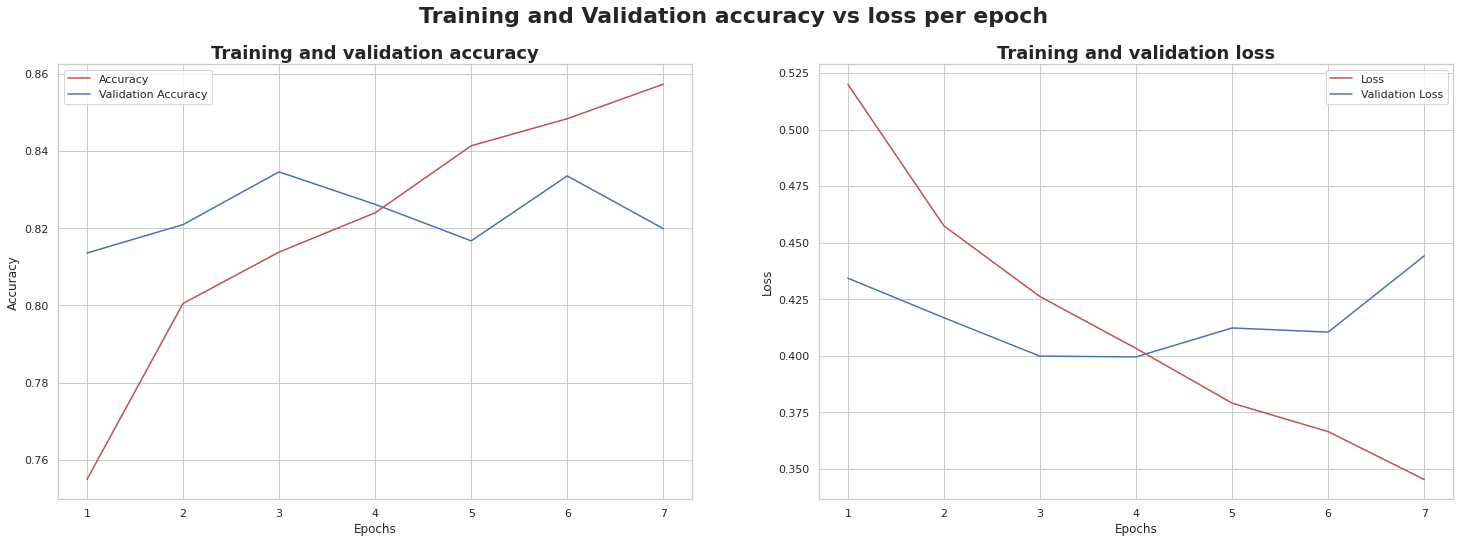

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(history.history['accuracy'])+1) # Get number of epochs

# Plot training and validation accuracy per epoch
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
ax1.plot(epochs, acc, 'r')
ax1.plot(epochs, val_acc, 'b')
ax1.set_title('Training and validation accuracy', fontsize=18, weight='bold')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["Accuracy", "Validation Accuracy"])

# Plot training and validation loss per epoch
ax2.plot(epochs, loss, 'r')
ax2.plot(epochs, val_loss, 'b')
ax2.set_title('Training and validation loss', fontsize=18, weight='bold')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Validation Loss"])

fig.suptitle('Training and Validation accuracy vs loss per epoch', fontsize=22, weight='bold')
fig.savefig('Training and Validation accuracy vs loss per epoch')

In [ ]:
preds = model.predict(X_test)
print(classification_report(np.round(preds), y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1120
         1.0       0.77      0.79      0.78       784

    accuracy                           0.82      1904
   macro avg       0.81      0.82      0.81      1904
weighted avg       0.82      0.82      0.82      1904



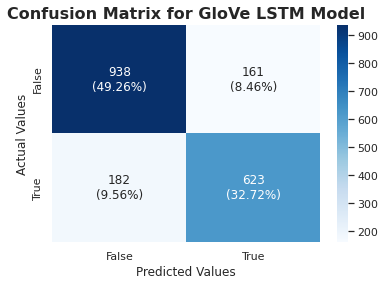

In [ ]:
cf_matrix = confusion_matrix(y_test, np.round(preds))

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

## Plotting
#plt.figure(figsize=(10,6))

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for GloVe LSTM Model', fontsize=16, weight='bold')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()
ax.get_figure().savefig('Confusion Matrix for GloVe LSTM Model.png')